In [1]:
import pickle
out_fp = "../../data/grmesa_confidence.pkl"
grmesa_confidence = pickle.load(open(out_fp, 'rb'))

In [2]:
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2


Text(0.5, 1.0, 'UAVSAR Coherence and ICESat2 Photon Overlap')

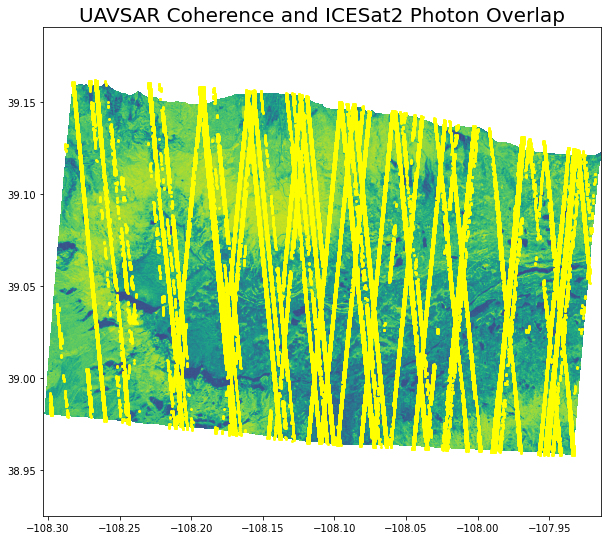

In [33]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))

fp = '/home/jovyan/isce_sat2/contributors/sam/download/grmesa_27416_20003-028_20005-007_0011d_s01_L090_01_int_grd/grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd.tiff'

src = rio.open(fp)
show((src), ax=ax)

#src.plot(ax=ax)
grmesa_confidence.plot(ax=ax, color='yellow', markersize = 4)
plt.title('UAVSAR Coherence and ICESat2 Photon Overlap', fontsize = 20)

#ctx.add_basemap(ax, crs=src.crs)


In [7]:
import numpy as np
import os
import rasterio as rio
from rasterio.plot import show


# This function written by David Shean, UW
def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname


In [9]:
grmesa_confidence['datetime'] = grmesa_confidence.index.to_pydatetime()
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,datetime
time,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,2018-10-17 22:31:18.451049
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,2018-10-17 22:31:18.458099
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,2018-10-17 22:31:18.465141
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,2018-10-17 22:31:18.472171
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,2018-10-17 22:31:18.479208


In [11]:
from os.path import expanduser, join
from glob import glob
import pandas as pd


shared_dir = expanduser('~/shared/isce_sat2/')
dirs = glob(join(shared_dir, '*'))
dirs = [d for d in dirs if 'tmp' not in d]
res = {}
for d in dirs:
    csv = pd.read_csv(glob(join(d, '*.csv'))[0], index_col = 0)
    
    start = pd.to_datetime(csv.loc['value','start time of acquisition for pass 1'])
    end = pd.to_datetime(csv.loc['value','stop time of acquisition for pass 2'])
    
    #start = pd.to_datetime(csv['start time of acquisition for pass 1'][0])
    #end  = pd.to_datetime(csv['stop time of acquisition for pass 2'][0])
    res[d] = {'start':start,'end':end}

In [12]:
results = pd.DataFrame()
for key, val in res.items():
    start = val['start']
    end = val['end']
    
    sub = grmesa_confidence[(grmesa_confidence['datetime'].dt.tz_localize('UTC')>start) & (grmesa_confidence['datetime'].dt.tz_localize('UTC')<end)]                                                                   
    try:
        cor_fp = glob(join(key, '*VV*.cor*'))[0]
        tmp = rio.open(cor_fp)
        sample_raster(sub, tmp)
        results = results.append(sub)
        
    except:
        print(key)
    

/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd


/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20017-006_0040d_s01_L090_01_int_grd


/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/tmp/ipykernel_684/2413074916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

In [13]:
results.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.cor.grd,grmesa_27416_21016-002_21017-017_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21017-017_21019-017_0006d_s01_L090VV_01.cor.grd,grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd
time,,,,,,,,,,,,,,,,,,,,,
2021-03-09 16:59:44.851112512,26,0.0,0.099561,10,2,1156,784609,0,4.813603,0.187239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858155616,20,0.0,0.118155,10,2,1156,784612,0,4.816803,0.187366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858494848,24,0.0,0.040237,10,4,1156,784606,0,3.000000,0.046540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865198768,28,0.0,0.209427,10,2,1156,784614,0,5.252246,0.204569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865526944,30,0.0,0.029173,10,4,1156,784608,0,3.000000,0.047860,...,NaN,0.854997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
results['all_data'] = results.bfill(axis=1).iloc[:,-10]

<AxesSubplot:xlabel='confidence', ylabel='all_data'>

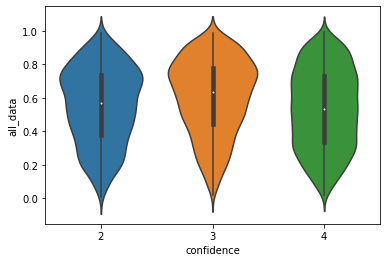

In [15]:
import seaborn as sns

sns.violinplot(x=results['confidence'].astype('category'), y = results['all_data'].astype('float'))